In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from MCMC_VMP import MCMC_VMP
from PMM import PMM

In [2]:
np.random.seed(0)

In [3]:
N, K = 1000, 5

print(f'Número dos observações: {N}\n')

print(f'Número das categorias latentes: {K}')

Número dos observações: 1000

Número das categorias latentes: 5


In [4]:
mu = np.linspace(start = 1, stop = 3*K, num = K)

print(f'Média das categorias latentes:\n')

print(mu)

Média das categorias latentes:

[ 1.   4.5  8.  11.5 15. ]


In [5]:
Z = np.random.multinomial(n = N, pvals = [1/K]*K)

print('Número de observações por categoria: \n')

print(Z)

Número de observações por categoria: 

[204 209 197 191 199]


In [6]:
Dados = {'X': [], 'Z': []}

for k in range(K):

    Dados['X'] += list(np.random.poisson(lam = mu[k], size = Z[k]))

    Dados['Z'] += [k]*Z[k]

Dados = pd.DataFrame(Dados)

Dados.head()

,X,Z
0,2,0
1,1,0
2,1,0
3,0,0
4,0,0


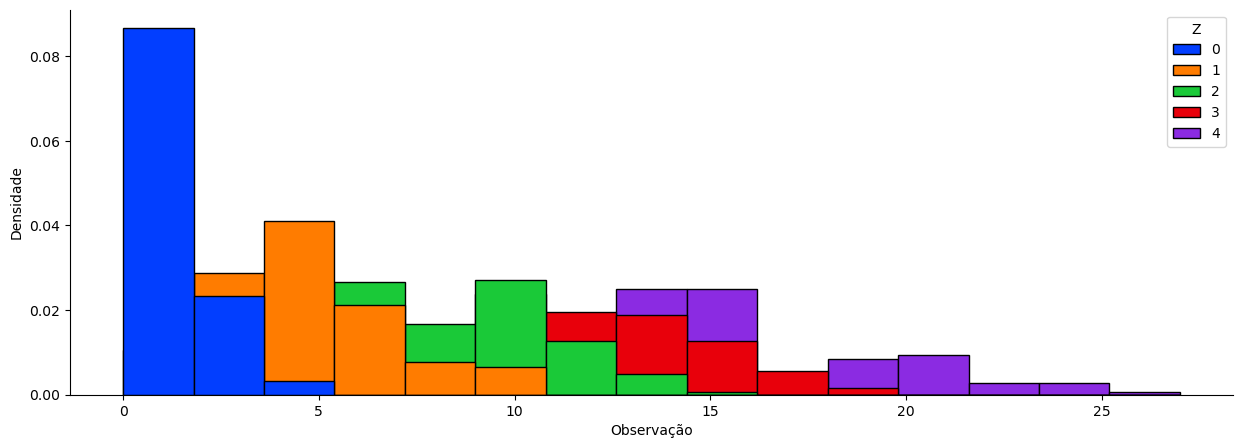

In [7]:
plt.figure(figsize = (15, 5))

Grafico = sns.histplot(

    data = Dados, x = 'X', hue = 'Z', 
    
    stat = 'density', bins = 15, 
    
    palette = 'bright', alpha = 1

)

Grafico.spines['right'].set_visible(False)

Grafico.spines['top'].set_visible(False)

plt.xlabel('Observação')

plt.ylabel('Densidade')

plt.show()

In [8]:
Modelo = MCMC_VMP(

    Dados = np.array(Dados['X']).reshape((-1, 1)), Categorias = K, 
    
    nu_0 = 1e-6, chi_0 = np.array([0]), 
    
    Distribuicao = PMM(),

    Amostra = 10, Descartadas = 20

)

Modelo.estima_modelo(num = 50)

In [10]:
print(np.exp(Modelo.eta))

[[ 4.32460288]
 [ 9.21246927]
 [ 8.00519477]
 [ 0.95593699]
 [13.91643546]]
